In [2]:
#step 1 : collecting data
import pandas as pd
import numpy as np
import seaborn as sns #for statistical plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
data=pd.read_csv('titanic.csv')
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#printing the number of passengers
print('number of passangers',str(len(data.index)))

number of passangers 891


#step 2: analayzing data



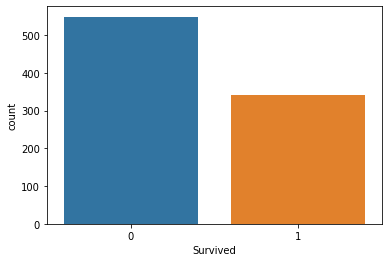

In [4]:
sns.countplot(x='Survived',data=data)

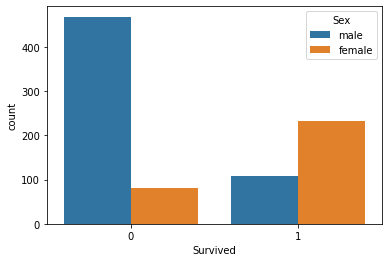

In [5]:
#sex count
sns.countplot(x='Survived',hue='Sex',data=data)

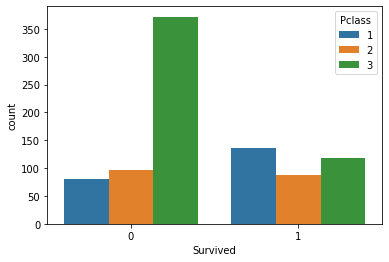

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=data)

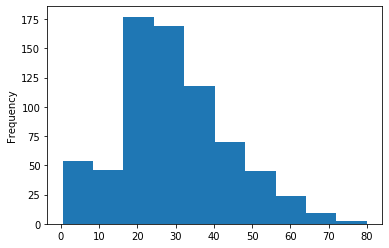

In [7]:
data['Age'].plot.hist()

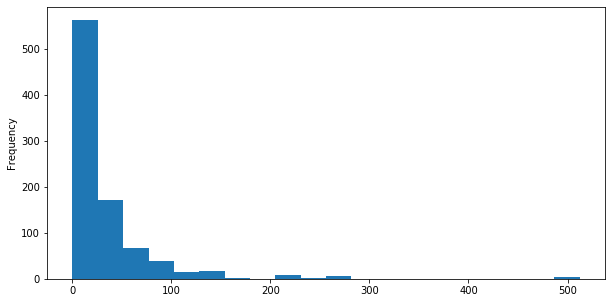

In [10]:
data['Fare'].plot.hist(bins=20, figsize=(10,5))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


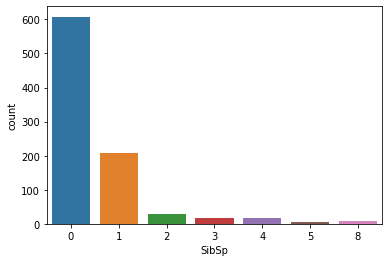

In [13]:
sns.countplot(x='SibSp',data=data)

step 3:data wrangling

In [14]:
#first i will check whether there is any null value present in the dataset
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

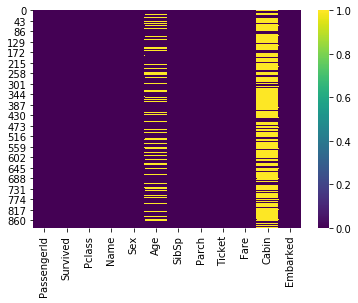

In [19]:
sns.heatmap(data.isnull(),cmap='viridis')

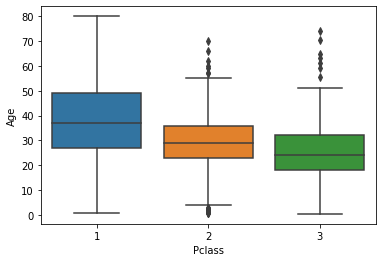

In [20]:
sns.boxplot(x='Pclass',y='Age',data=data)

#to fill the null point or simply drop the colmn
this method is called imputation


In [21]:
data.drop("Cabin",axis=1,inplace=True)

In [22]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [24]:
data.dropna(inplace=True)

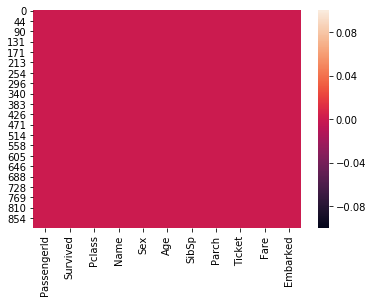

In [25]:
sns.heatmap(data.isnull())

In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

as in linear regression only binary value is supported.therefore we have to transform the strings into binary using pandas library

In [27]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


In [28]:
pclass=pd.get_dummies(data["Pclass"],drop_first=True)
pclass.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [30]:
embark=pd.get_dummies(data["Embarked"],drop_first=True)
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [32]:
#now concatanate the new column
data=pd.concat([data,sex,pclass,embark],axis=1)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [35]:
#nnow dropping the unnecessary column
data.drop(['Sex','Ticket','Embarked','Name','PassengerId','Pclass'],axis=1,inplace=True)
data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


# step 4: train data

In [36]:
X=data.drop("Survived",axis=1)
Y=data["Survived"]

In [38]:
#split the dataset
from sklearn.model_selection import train_test_split

In [40]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model= LogisticRegression()

In [43]:
log_model.fit(X_train,y_train)

C:\Users\klikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions=log_model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [47]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.83       139\n           1       0.75      0.73      0.74        96\n\n    accuracy                           0.79       235\n   macro avg       0.78      0.78      0.78       235\nweighted avg       0.79      0.79      0.79       235\n'

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,predictions)

array([[116,  23],
       [ 26,  70]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,predictions)

0.7914893617021277